In [121]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [122]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [123]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [124]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [125]:
X_train_encoder = X_train
X_test_encoder = X_test
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape)

(60000, 784)


# Task - 1
## For M = 9

In [126]:
# Applying PCA
pca_9 = PCA(n_components = 9)
X_9_train = pca_9.fit_transform(X_train)
X_9_test = pca_9.fit_transform(X_test)
print(X_9_train.shape)
print(X_9_test.shape)

(60000, 9)
(10000, 9)


### For k = 3

In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_9_train, y_train)
y_pred = knn.predict(X_9_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1631


### For k = 5

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_9_train, y_train)
y_pred = knn.predict(X_9_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.1641


# Task - 2
## For M = 9

In [130]:
lda = LDA(n_components=9)
lda.fit(X_train, y_train)
X_9_train = lda.transform(X_train)
X_9_test = lda.transform(X_test)
print(X_9_train.shape)
print(X_9_test.shape)

(60000, 9)
(10000, 9)


### For k = 3

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_9_train, y_train)
y_pred = knn.predict(X_9_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9105


### For k = 5

In [132]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_9_train, y_train)
y_pred = knn.predict(X_9_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.9145


# Task - 3
## For M = 9

In [133]:
class Autoencoder(Model):
    def __init__(self, P, Q, R, M):
        super(Autoencoder, self).__init__()
        
        self.encoder = Sequential([
          layers.Flatten(),
          layers.Dense(P, activation='relu'),
          layers.Dense(Q, activation='relu'),
          layers.Dense(R, activation='relu'),
          layers.Dense(M, activation='relu'),
        ])
        
        self.decoder = Sequential([
          layers.Dense(P, activation='relu'),
          layers.Dense(Q, activation='relu'),
          layers.Dense(R, activation='relu'),
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

In [134]:
autoencoder_9 = Autoencoder(P=128, Q=128, R=128, M=9)
autoencoder_9.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_9.fit(
    X_train_encoder,
    X_train_encoder,
    epochs=10,
    shuffle=True,
    validation_data=(X_test_encoder, X_test_encoder)
)

X_autoencoder_9_train = autoencoder_9.encoder(X_train_encoder).numpy()
X_autoencoder_9_test =  autoencoder_9.encoder(X_test_encoder).numpy()

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0373 - val_loss: 0.0260
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0247 - val_loss: 0.0239
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0225 - val_loss: 0.0215
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0211 - val_loss: 0.0206
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0202 - val_loss: 0.0195
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0195 - val_loss: 0.0189
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0190 - val_loss: 0.0189
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0186 - val_loss: 0.0184
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0182 - val_loss: 0.0181
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### For K = 3

In [135]:
X_autoencoder_9_train.shape

(60000, 9)

In [136]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_autoencoder_9_train, y_train)
y_pred = knn.predict(X_autoencoder_9_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.942


### For K = 5

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_autoencoder_9_train, y_train)
y_pred = knn.predict(X_autoencoder_9_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)

Accuracy: 0.9431


# Task - 4
## Comparison of Accuracies

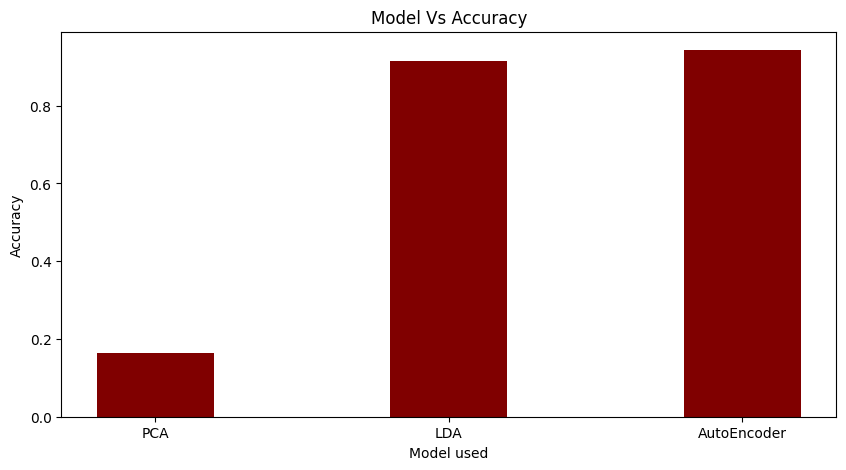

In [141]:
data = {'PCA':accuracy1, 'LDA':accuracy2, 'AutoEncoder':accuracy3}
xa = list(data.keys())
ya = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(xa,  ya, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model used")
plt.ylabel("Accuracy")
plt.title("Model Vs Accuracy")
plt.show()